## Pilot study

In [1]:
library("car")

Loading required package: carData


In [1]:
data1 <- read.csv(file = "data_pilot/1/bubble_1024.txt", header = 0)
data2 <- read.csv(file = "data_pilot/1/quick_1024.txt", header = 0)

print("power t-test on time (paired)")
power.t.test(power = 0.99, delta = 0.004, sd = sd(data1$V1 - data1$V2), sig.level = 0.01, type = "one.sample")
power.t.test(n = 206, delta = 0.005, sd = sd(data1$V1 - data1$V2), sig.level = 0.01, type = "one.sample")
print("power t-test on comparison (quick)")
power.t.test(power = 0.80, delta = 100, sd = sd(data2$V2), sig.level = 0.05)
power.t.test(n = 206, delta = 100, sd = sd(data2$V2), sig.level = 0.05)

[1] "power t-test on time (paired)"



     One-sample t test power calculation 

              n = 218.4835
          delta = 0.004
             sd = 0.01196852
      sig.level = 0.01
          power = 0.99
    alternative = two.sided



     One-sample t test power calculation 

              n = 206
          delta = 0.005
             sd = 0.01196852
      sig.level = 0.01
          power = 0.999626
    alternative = two.sided


[1] "power t-test on comparison (quick)"



     Two-sample t test power calculation 

              n = 505.9322
          delta = 100
             sd = 567.1709
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 206
          delta = 100
             sd = 567.1709
      sig.level = 0.05
          power = 0.4306313
    alternative = two.sided

NOTE: n is number in *each* group


## Checking t-test power of the data

In [2]:
# checking
data11 <- read.csv(file = "data_raw/1/quick_1024.txt", header = 0)
data12 <- read.csv(file = "data_raw/1/bubble_1024.txt", header = 0)
data21  <- read.csv(file = "data_raw/0.5/quick_1024.txt", header = 0)
data22  <- read.csv(file = "data_raw/0.5/bubble_1024.txt", header = 0)

#time
power.t.test(power = 0.95, delta = 0.005, sd = sd(data11$V1 - data12$V1), sig.level = 0.01, type = "two.sample")
#comp
power.t.test(power = 0.95, delta = 1, sd = sd(data11$V2), sig.level = 0.01, type = "one.sample")
#error
power.t.test(power = 0.95, delta = 1, sd = sd(data21$V3 - data22$V3), sig.level = 0.01, type = "two.sample")


     Two-sample t test power calculation 

              n = 636.9702
          delta = 0.005
             sd = 0.02111372
      sig.level = 0.01
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group



     One-sample t test power calculation 

              n = 7242091
          delta = 1
             sd = 637.6013
      sig.level = 0.01
          power = 0.95
    alternative = two.sided



     Two-sample t test power calculation 

              n = 120.0195
          delta = 1
             sd = 1.822564
      sig.level = 0.01
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


## Question 1

In [112]:
n <- c(4,8,16,32,64,128,256,512,1024, 2048, 2896, 4096)
pvalues <- data.frame()

for(i in n){
    file = paste("data_raw/1/quick_", i, ".txt", sep="")
    data <- read.csv(file=file, header = 0)
    
    pvalues <- rbind(pvalues, list(i, t.test(data$V2, alternative = "less", mu = i*log2(i), conf.level = 0.95)$p.value))
}

names(pvalues) <- c("input_size", "p-value")
pvalues
#write.table(pvalues, file="q1.txt", row.names = FALSE, col.names = FALSE, sep=",")

input_size,p-value
4,1.424627e-119
8,3.701857e-85
16,6.323079e-74
32,2.105577e-45
64,2.606640e-12
128,1.283454e-01
256,1.000000e+00
512,1.000000e+00
1024,1.000000e+00
2048,1.000000e+00


In [113]:
for(i in n){
    print(c("n: ", i))
    file = paste("data_raw/1/quick_", i, ".txt", sep="")
    data <- read.csv(file=file, header = 0)
    
    print(shapiro.test(data$V2))
    
    pvalues <- rbind(pvalues, list(i, t.test(data$V2, alternative = "less", mu = i*log2(i), conf.level = 0.95)$p.value))
}

[1] "n: " "4"  

	Shapiro-Wilk normality test

data:  data$V2
W = 0.71929, p-value < 2.2e-16

[1] "n: " "8"  

	Shapiro-Wilk normality test

data:  data$V2
W = 0.88541, p-value = 2.047e-11

[1] "n: " "16" 

	Shapiro-Wilk normality test

data:  data$V2
W = 0.90158, p-value = 2.049e-10

[1] "n: " "32" 

	Shapiro-Wilk normality test

data:  data$V2
W = 0.93466, p-value = 5.594e-08

[1] "n: " "64" 

	Shapiro-Wilk normality test

data:  data$V2
W = 0.94485, p-value = 4.424e-07

[1] "n: " "128"

	Shapiro-Wilk normality test

data:  data$V2
W = 0.97635, p-value = 0.001515

[1] "n: " "256"

	Shapiro-Wilk normality test

data:  data$V2
W = 0.93599, p-value = 7.25e-08

[1] "n: " "512"

	Shapiro-Wilk normality test

data:  data$V2
W = 0.95936, p-value = 1.264e-05

[1] "n: "  "1024"

	Shapiro-Wilk normality test

data:  data$V2
W = 0.96386, p-value = 4.042e-05

[1] "n: "  "2048"

	Shapiro-Wilk normality test

data:  data$V2
W = 0.96466, p-value = 5.016e-05

[1] "n: "  "2896"

	Shapiro-Wilk normali

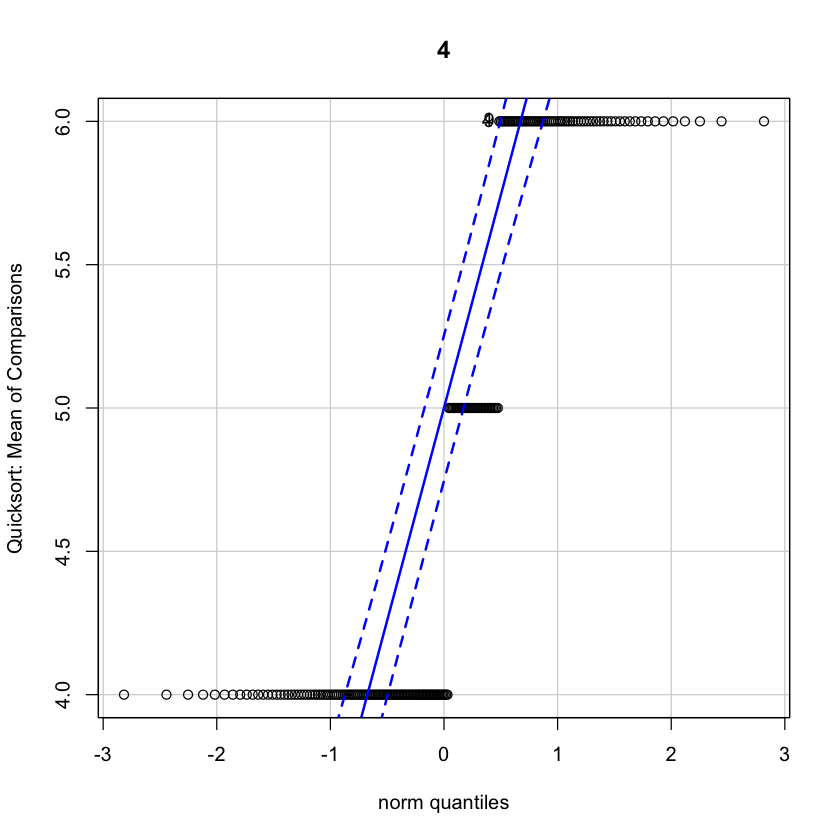

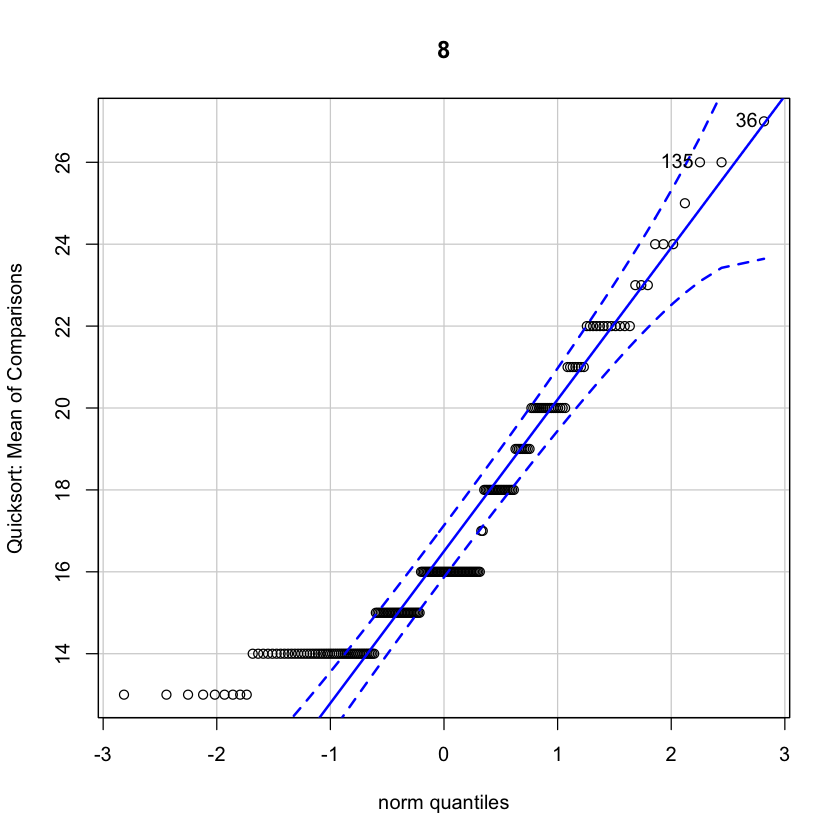

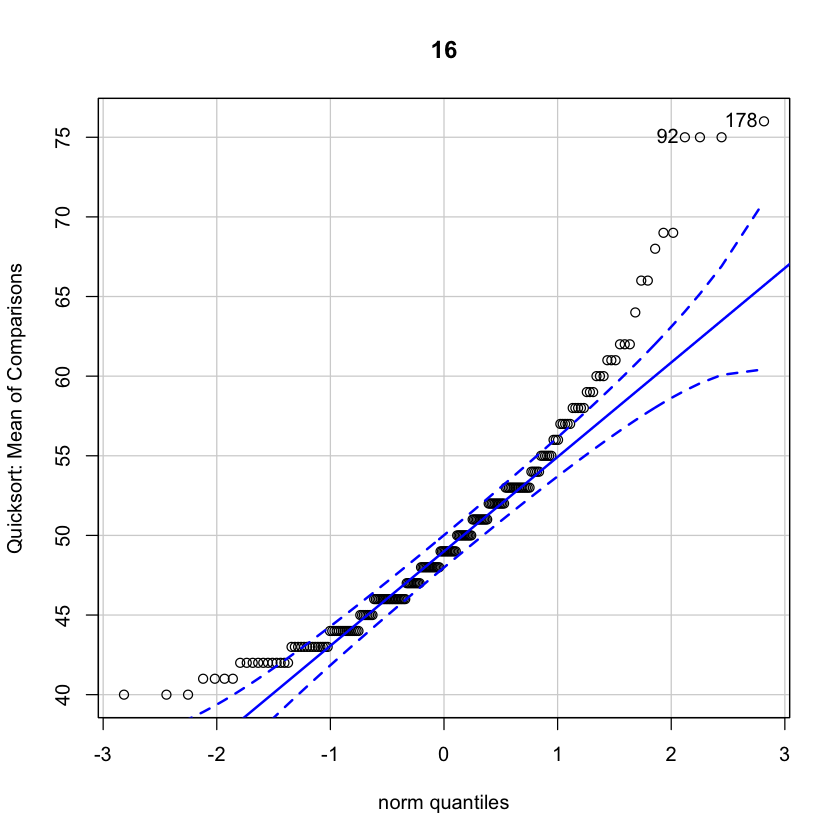

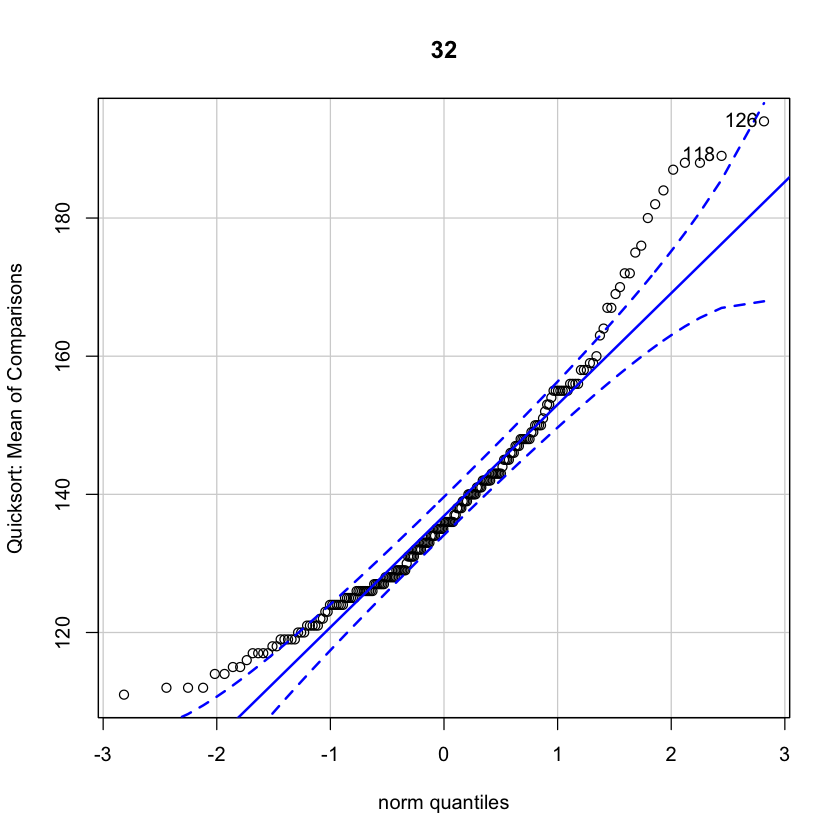

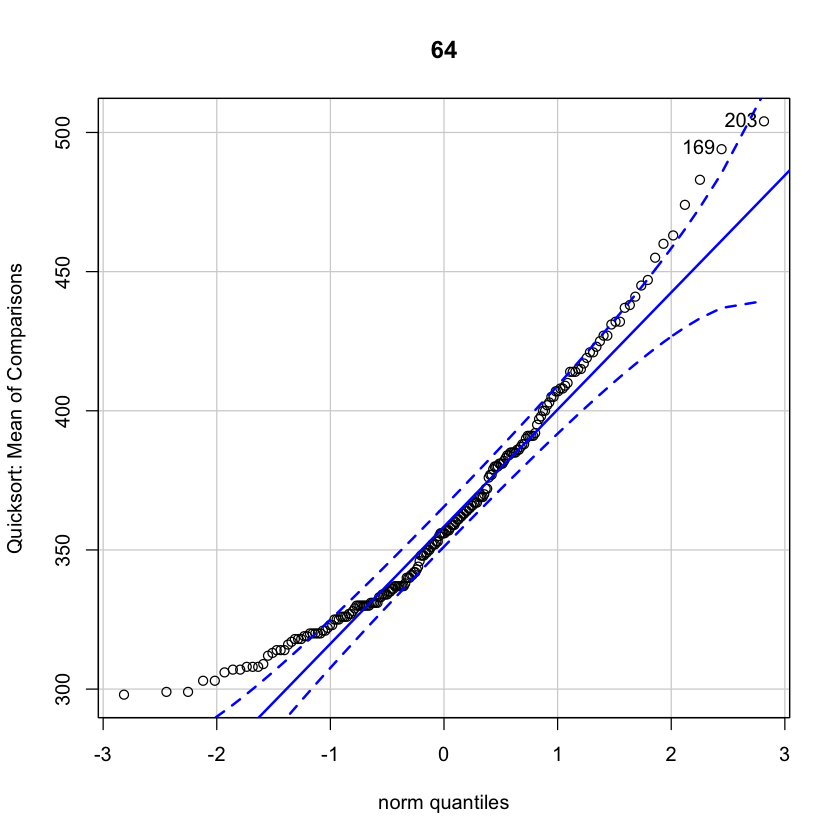

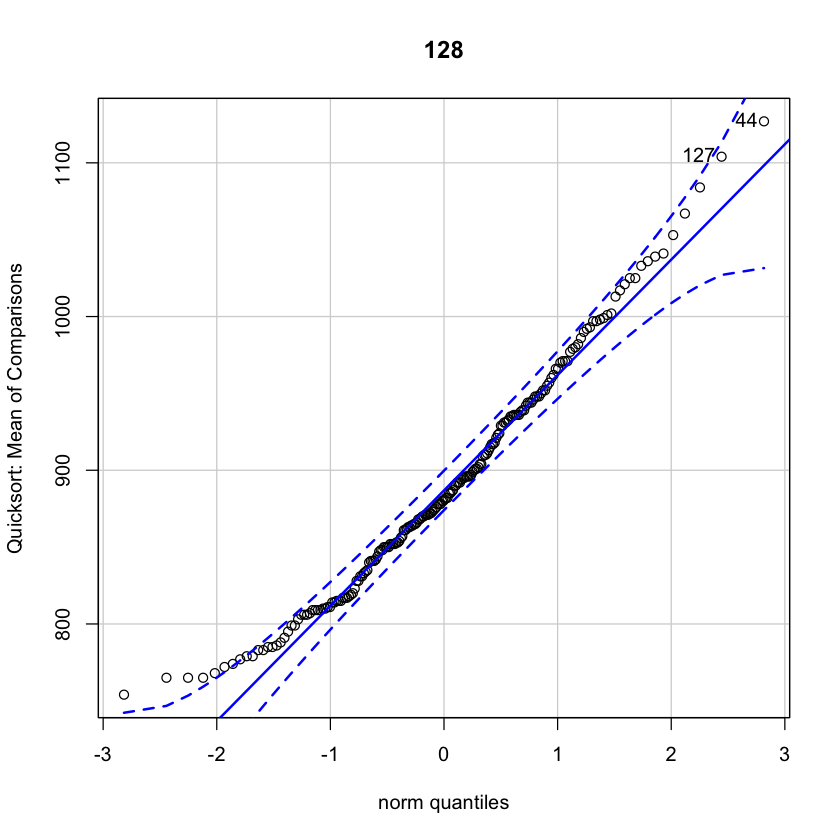

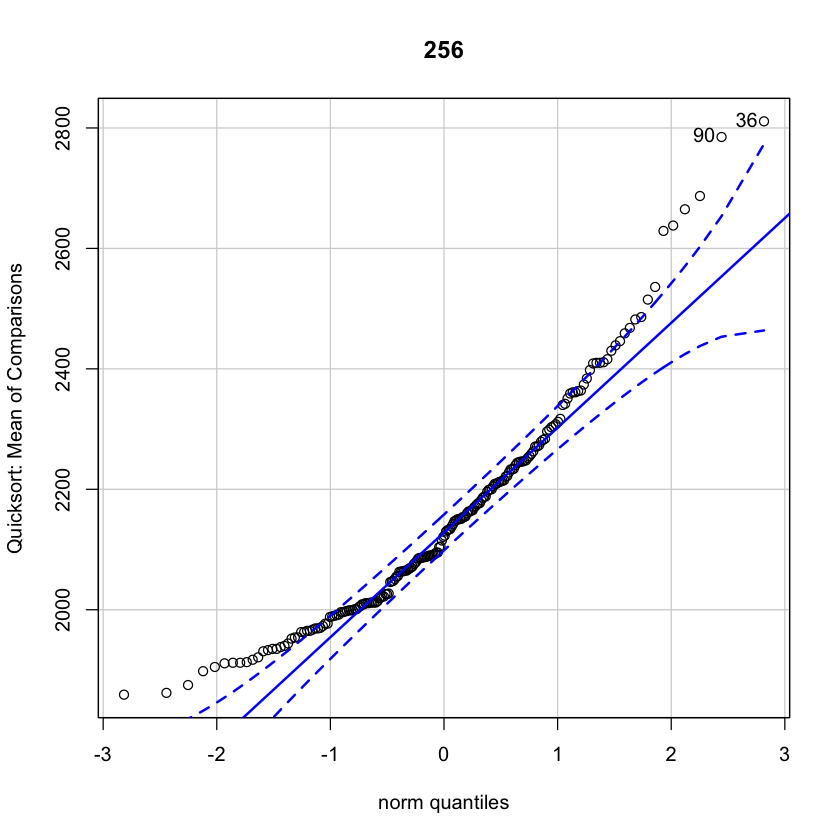

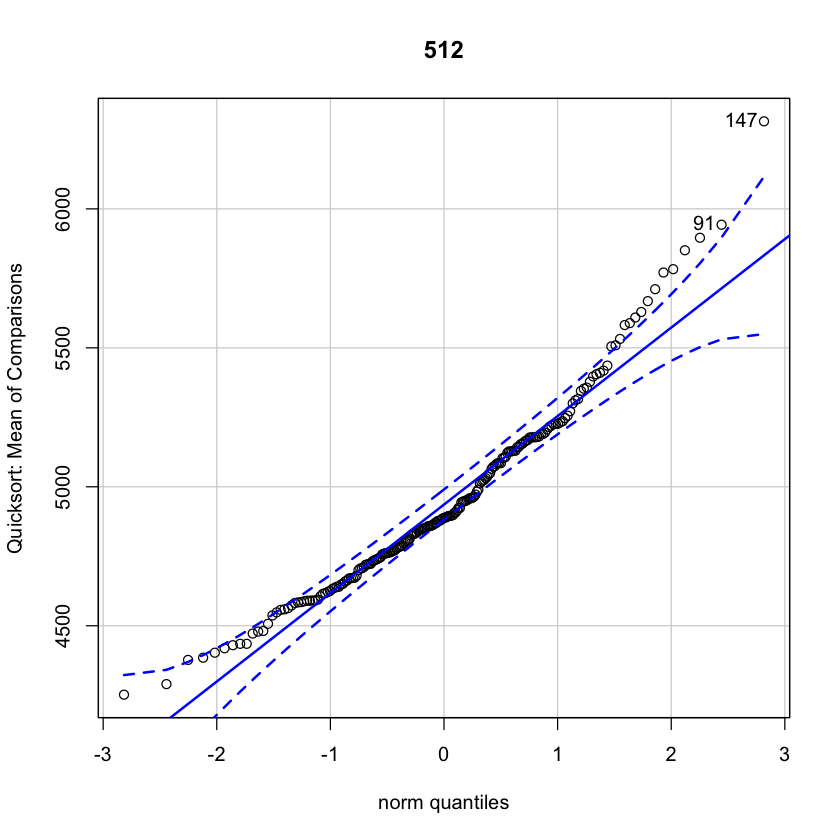

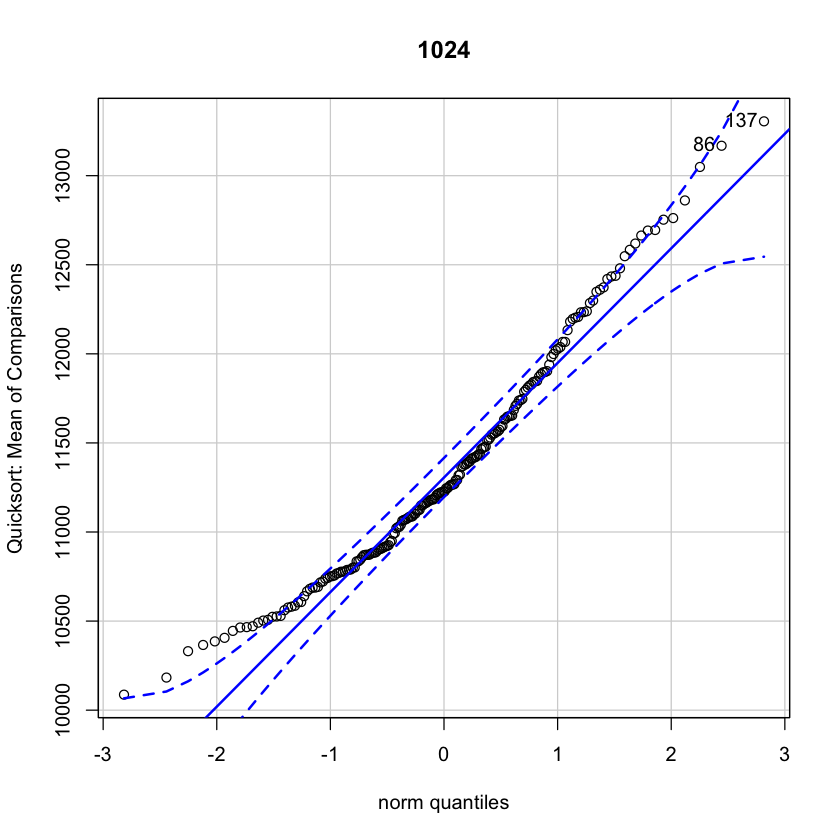

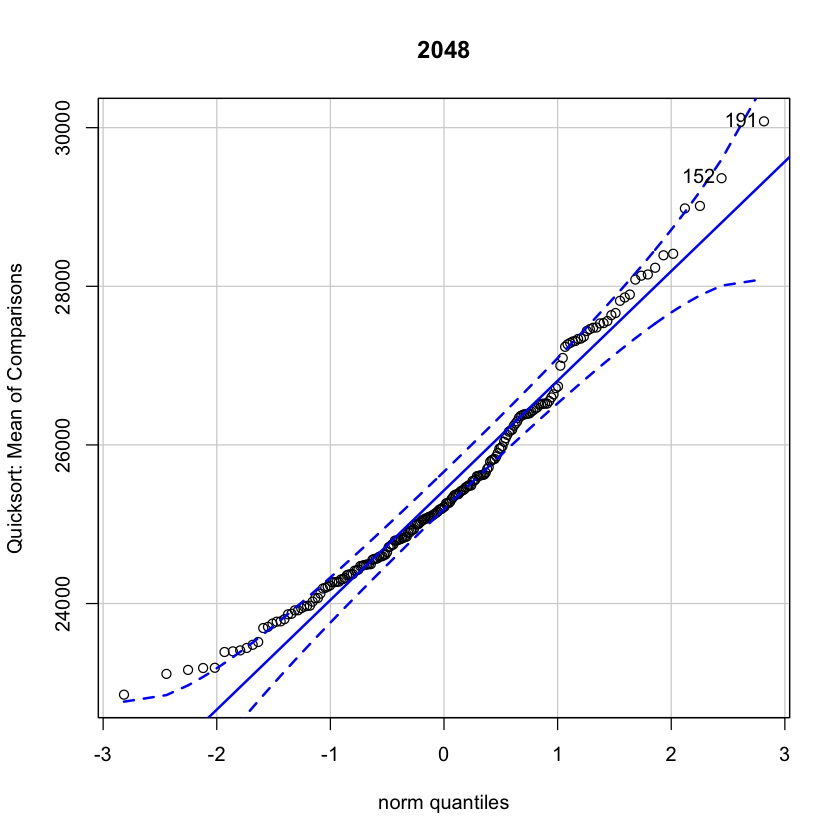

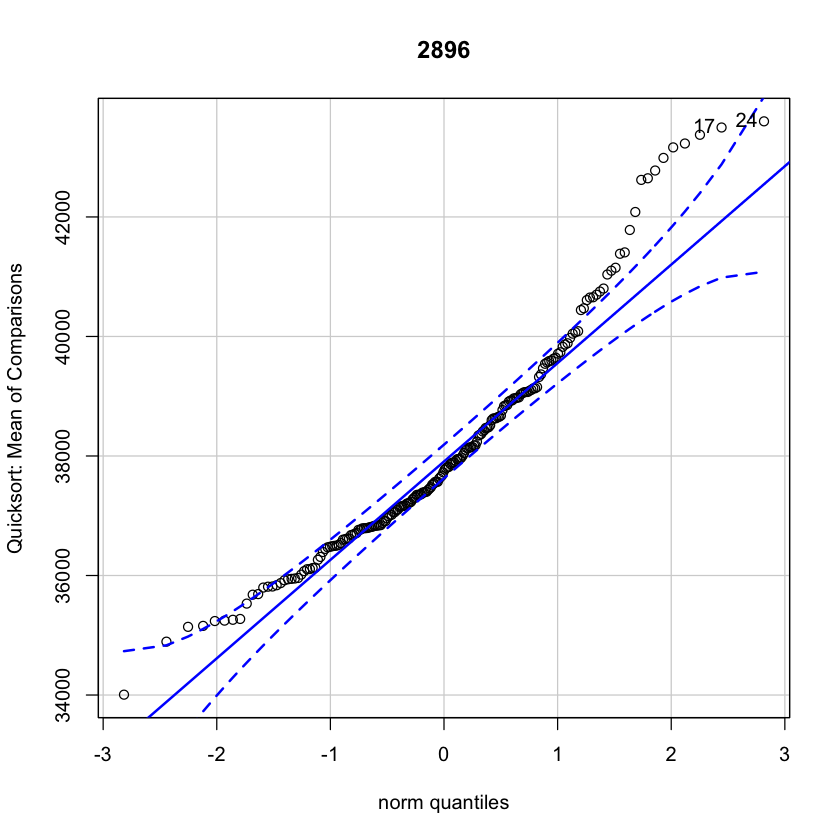

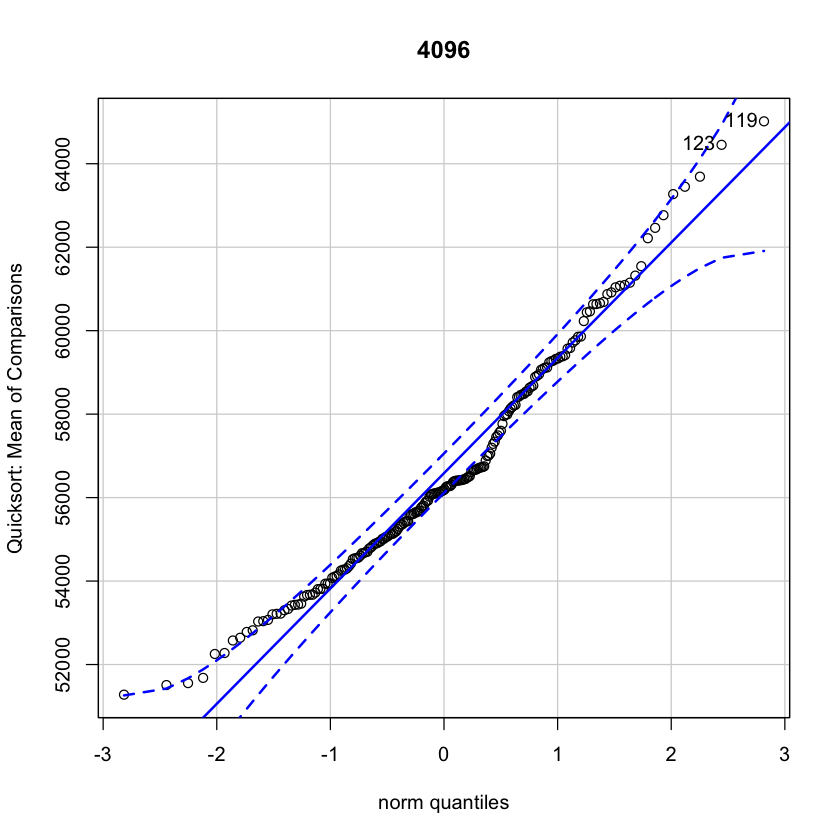

In [117]:
for(i in n){
    file = paste("data_raw/1/quick_", i, ".txt", sep="")
    data <- read.csv(file=file, header = 0)
    qqPlot(data$V2, main=i, ylab="Quicksort: Mean of Comparisons")
    
    pvalues <- rbind(pvalues, list(i, t.test(data$V2, alternative = "less", mu = i*log2(i), conf.level = 0.95)$p.value))
}

## Question 2

In [4]:
data.q <- read.csv(file = "data_p/1/quick.txt", header = 1)
data.b <- read.csv(file = "data_p/1/bubble.txt", header = 1)

t.test(x=data.q$TIME_MEAN, y=data.b$TIME_MEAN, paired=TRUE, alternative="greater", conf.level = 0.95)


	Paired t-test

data:  data.q$TIME_MEAN and data.b$TIME_MEAN
t = -1.7091, df = 12, p-value = 0.9434
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.922954       Inf
sample estimates:
mean of the differences 
             -0.9413177 


In [7]:
print("Shapiro Quick")
shapiro.test(data.q$TIME_MEAN)
print("Shapiro Bubble")
shapiro.test(data.b$TIME_MEAN)

[1] "Shapiro Quick"



	Shapiro-Wilk normality test

data:  data.q$TIME_MEAN
W = 0.67645, p-value = 0.0003258


[1] "Shapiro Bubble"



	Shapiro-Wilk normality test

data:  data.b$TIME_MEAN
W = 0.5676, p-value = 3.486e-05


Loading required package: carData


[1] 13 12

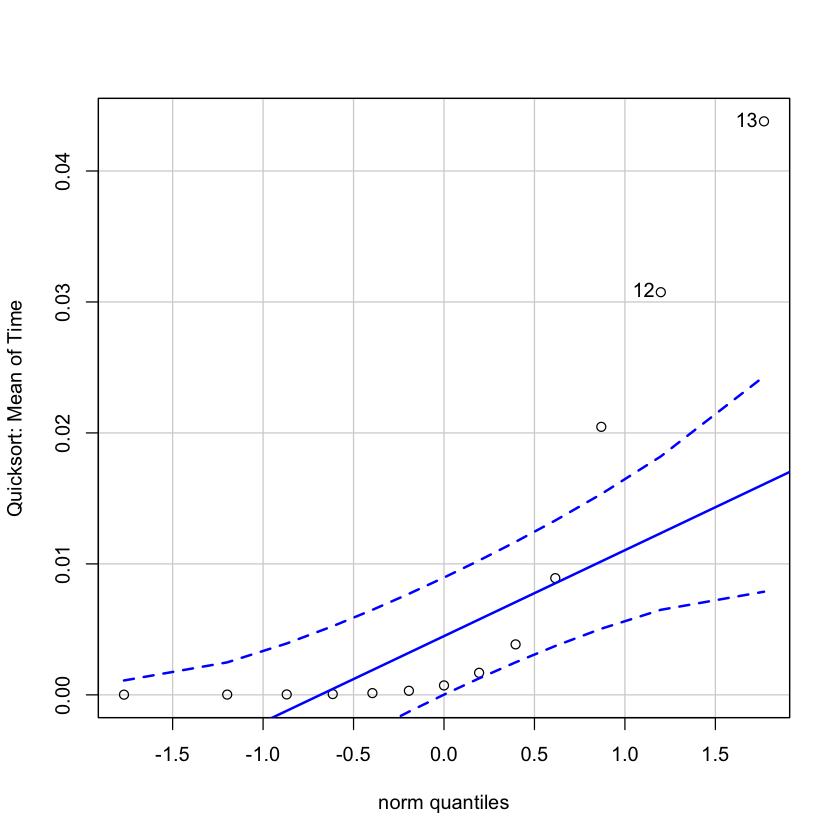

[1] 13 12

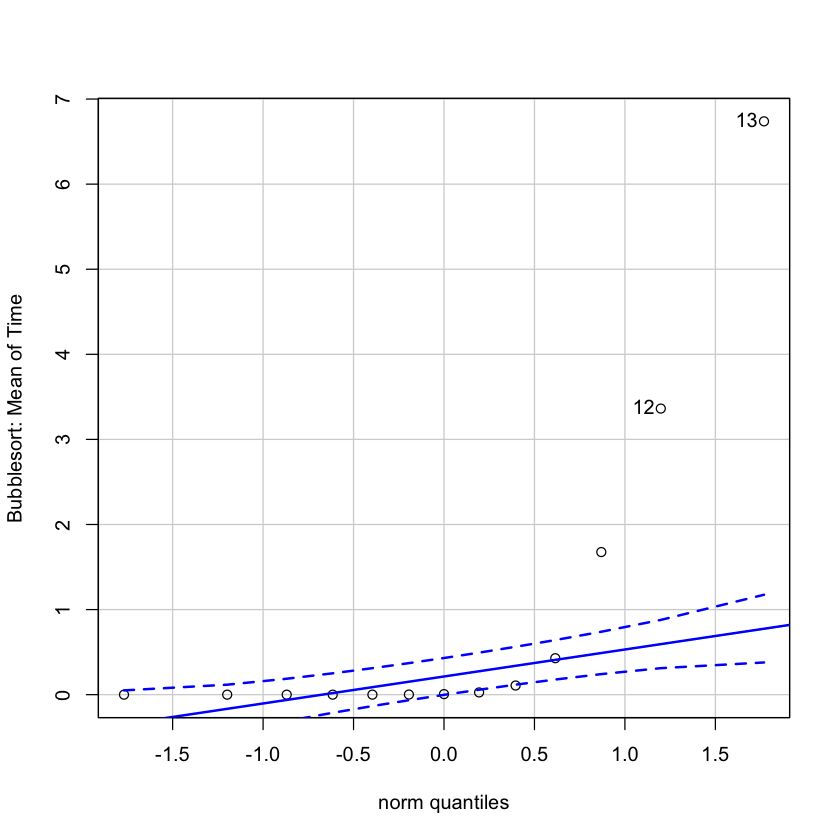

In [5]:
qqPlot(data.q$TIME_MEAN, ylab="Quicksort: Mean of Time")
qqPlot(data.b$TIME_MEAN, ylab="Bubblesort: Mean of Time")

## Question 3

[1] "f = 0.25"



	Paired t-test

data:  data.q$TIME_MEAN and data.b$TIME_MEAN
t = -1.362, df = 6, p-value = 0.2221
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.595555  1.024092
sample estimates:
mean of the differences 
              -1.285732 


[1] "Shapiro Quick 0.25"



	Shapiro-Wilk normality test

data:  data.q$TIME_MEAN
W = 0.76266, p-value = 0.01717


[1] "Shapiro Bubble 0.25"



	Shapiro-Wilk normality test

data:  data.b$TIME_MEAN
W = 0.61515, p-value = 0.0004093


[1] 7 1

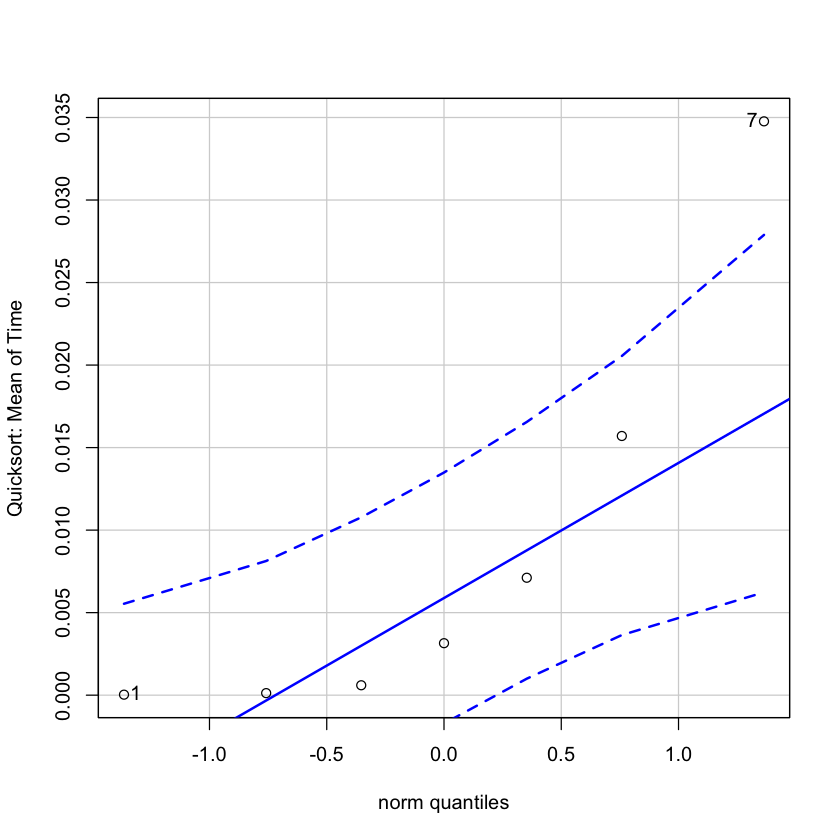

[1] 7 1

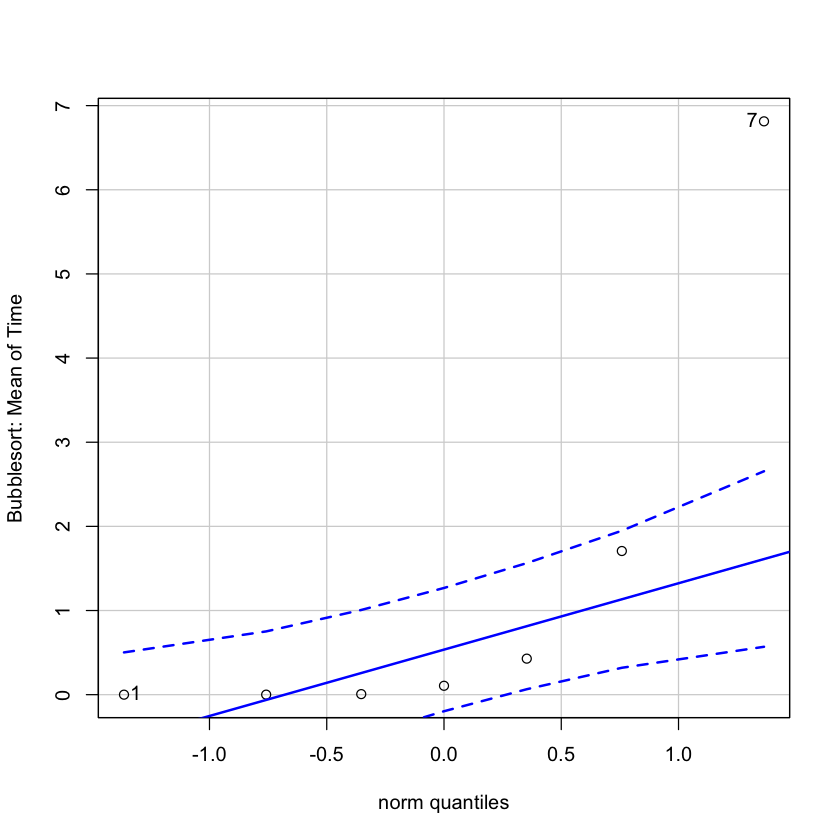

In [19]:
print("f = 0.25")
data.q <- read.csv(file = "data_p/0.25/quick.txt", header = 1)
data.b <- read.csv(file = "data_p/0.25/bubble.txt", header = 1)
t.test(x=data.q$TIME_MEAN, y=data.b$TIME_MEAN, paired=TRUE, alternative="two.sided", conf.level = 0.95)

print("Shapiro Quick 0.25")
shapiro.test(data.q$TIME_MEAN)
print("Shapiro Bubble 0.25")
shapiro.test(data.b$TIME_MEAN)

qqPlot(data.q$TIME_MEAN, ylab="Quicksort: Mean of Time")
qqPlot(data.b$TIME_MEAN, ylab="Bubblesort: Mean of Time")

[1] "f = 0.5"



	Paired t-test

data:  data.q$TIME_MEAN and data.b$TIME_MEAN
t = -1.3642, df = 6, p-value = 0.2215
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.601357  1.023150
sample estimates:
mean of the differences 
              -1.289104 


[1] "Shapiro Quick 0.5"



	Shapiro-Wilk normality test

data:  data.q$TIME_MEAN
W = 0.762, p-value = 0.01691


[1] "Shapiro Bubble 0.5"



	Shapiro-Wilk normality test

data:  data.b$TIME_MEAN
W = 0.61593, p-value = 0.000418


[1] 7 1

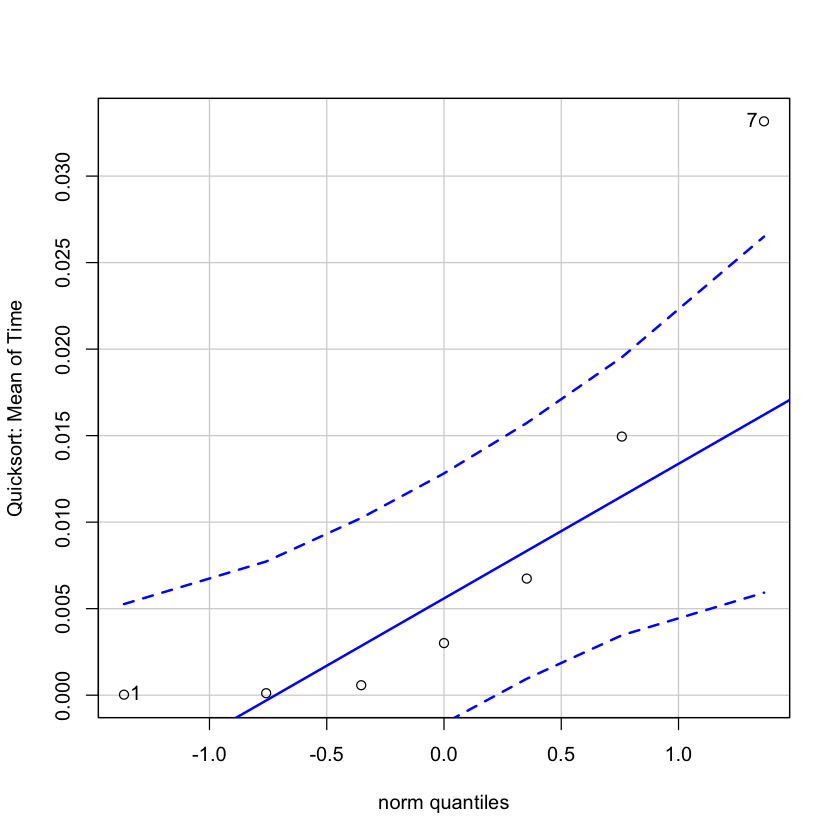

[1] 7 1

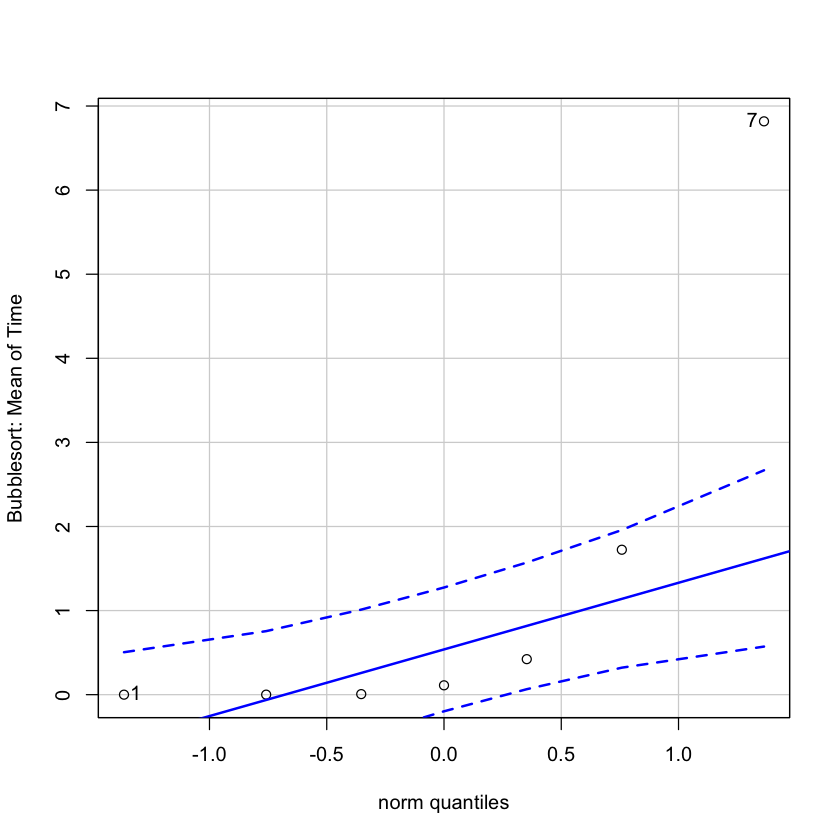

In [20]:
print("f = 0.5")
data.q <- read.csv(file = "data_p/0.5/quick.txt", header = 1)
data.b <- read.csv(file = "data_p/0.5/bubble.txt", header = 1)
t.test(x=data.q$TIME_MEAN, y=data.b$TIME_MEAN, paired=TRUE, alternative="two.sided", conf.level = 0.95)

print("Shapiro Quick 0.5")
shapiro.test(data.q$TIME_MEAN)
print("Shapiro Bubble 0.5")
shapiro.test(data.b$TIME_MEAN)

qqPlot(data.q$TIME_MEAN, ylab="Quicksort: Mean of Time")
qqPlot(data.b$TIME_MEAN, ylab="Bubblesort: Mean of Time")

[1] "f = 0.75"



	Paired t-test

data:  data.q$TIME_MEAN and data.b$TIME_MEAN
t = -1.3477, df = 6, p-value = 0.2264
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.760818  1.089432
sample estimates:
mean of the differences 
              -1.335693 


[1] "Shapiro Quick 0.75"



	Shapiro-Wilk normality test

data:  data.q$TIME_MEAN
W = 0.76228, p-value = 0.01702


[1] "Shapiro Bubble 0.75"



	Shapiro-Wilk normality test

data:  data.b$TIME_MEAN
W = 0.60908, p-value = 0.0003478


[1] 7 1

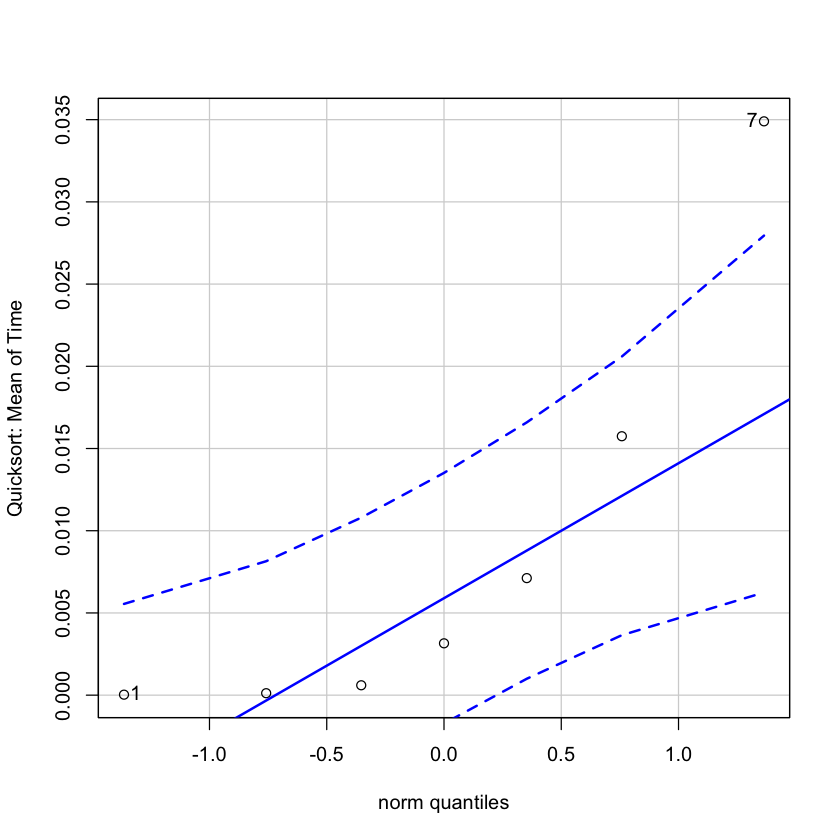

[1] 7 1

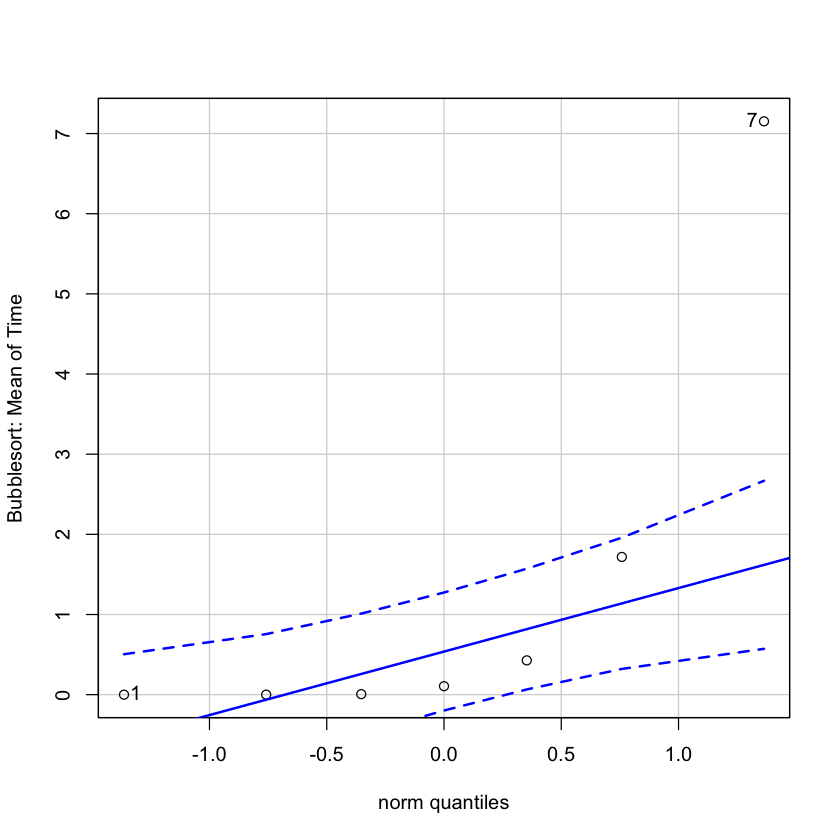

In [21]:
print("f = 0.75")
data.q <- read.csv(file = "data_p/0.75/quick.txt", header = 1)
data.b <- read.csv(file = "data_p/0.75/bubble.txt", header = 1)
t.test(x=data.q$TIME_MEAN, y=data.b$TIME_MEAN, paired=TRUE, alternative="two.sided", conf.level = 0.95)

print("Shapiro Quick 0.75")
shapiro.test(data.q$TIME_MEAN)
print("Shapiro Bubble 0.75")
shapiro.test(data.b$TIME_MEAN)

qqPlot(data.q$TIME_MEAN, ylab="Quicksort: Mean of Time")
qqPlot(data.b$TIME_MEAN, ylab="Bubblesort: Mean of Time")